In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.interpolate import CubicSpline
from scipy import signal
import json
import os
import sklearn

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
energy_subset_data = '[{"gas": "N2", "database": "Biagi", "elastic": {"gas": "N2", "database": "Biagi", "thresh": 1.95e-05,"energy": [0.1, 0.2, 0.3, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4,  0.4, 0.4, 0.4, 0.4, 0.4, 0.4,  0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 1.0 ],"crosssection": [5.949376639133945e-20, 6.131469818074801e-20, 6.320587282896038e-20, 6.515913653981583e-20, 6.71744644735211e-20, 6.925104704273283e-20, 7.127481309727256e-20, 7.314891186548283e-20, 7.507262529062305e-20, 7.704689646759236e-20, 7.890446876337094e-20, 8.079084286284147e-20, 8.27180638083209e-20, 8.460166240501933e-20, 8.652829311923713e-20, 8.838254644227031e-20, 9.01907658655359e-20, 9.194852005998132e-20, 9.361163434808685e-20, 9.535109214285191e-20, 9.717795347983738e-20, 9.900242802836551e-20, 1.008531828028567e-19, 1.0288384885584341e-19, 1.0504559606731581e-19, 1.072924532817848e-19, 1.0936100883679342e-19, 1.1084187495320565e-19, 1.1219348628250873e-19, 1.1283740315900543e-19, 1.1218894363753234e-19, 1.115438458160456e-19, 1.1090276014610351e-19, 1.102654920063481e-19, 1.0951623460800627e-19, 1.0765152386580732e-19, 1.0663860198030064e-19, 1.0837777410417234e-19, 1.1014562036414535e-19, 1.1194209151573252e-19, 1.237320444601671e-19, 1.473709600888261e-19, 1.7841827379924167e-19, 1.8346263739814012e-19, 2.1060581999268626e-19, 2.0730808613752165e-19, 2.445790193420443e-19, 2.072868032368989e-19, 1.780759670195416e-19, 1.6333794685469934e-19, 1.3735117609547442e-19, 1.1499344320071587e-19, 1.0376114543818329e-19, 9.828282793398945e-20, 9.371301222109917e-20, 9.077571020111272e-20, 8.905529255561417e-20, 8.762454706729687e-20, 8.608769668043848e-20, 8.482030052403577e-20, 8.384957655573837e-20, 8.318165880352852e-20, 8.25933971659685e-20, 8.20090459315844e-20, 8.234180731914728e-20, 8.269068603137688e-20, 8.304110499468699e-20, 8.33928695325526e-20, 8.370740535833359e-20, 8.346967474811306e-20, 8.3231862298994e-20, 8.299601944133909e-20, 8.275907866631007e-20, 8.252370400354281e-20, 8.228937553590722e-20, 8.205479585634715e-20, 8.18213615652286e-20, 8.144922563108593e-20, 7.989394578113441e-20, 7.821414501838892e-20, 7.612552066098668e-20, 7.382120493102262e-20, 7.146839231657938e-20, 6.924831863132946e-20, 6.694142533961727e-20, 6.492416521294657e-20, 6.28364282664725e-20, 6.072074198769846e-20, 5.849824894858854e-20, 5.597537925683187e-20, 5.2917074277363396e-20, 4.9439255703425975e-20, 4.600870688739556e-20, 4.28919145987507e-20, 3.9824679178874105e-20, 3.7135228706578015e-20, 3.443120459273693e-20, 3.149750945160895e-20, 2.882158911546871e-20, 2.6666961889613366e-20]},"ionization": {"gas": "N2", "database": "Biagi", "thresh": 15.581, "energy": [], "crosssection": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.7514345738076207e-22, 1.2376241452658704e-21, 2.429388396532603e-21, 3.8603488003870156e-21, 5.417172481057928e-21, 7.142382385904134e-21, 9.161451016178709e-21, 1.108865737220257e-20, 1.2903677955397095e-20, 1.4746748933068945e-20, 1.6289406681861588e-20, 1.7942307348345403e-20, 1.93492838741499e-20, 2.0633228934754576e-20, 2.1793890430832445e-20, 2.2789501429095338e-20, 2.358788182018761e-20, 2.434228161975447e-20, 2.4752285342844106e-20, 2.490489305927308e-20, 2.469758366936731e-20, 2.4492271072358012e-20, 2.4288173131281737e-20, 2.4085914552377672e-20, 2.388541094988956e-20, 2.3294729539962322e-20, 2.2628211938369743e-20, 2.182467308573464e-20, 2.096096521918434e-20, 2.0078050300244484e-20, 1.9196369989411022e-20, 1.840080970561749e-20, 1.7597999453765554e-20, 1.6760044902304314e-20, 1.5911275521201832e-20, 1.5057066517346618e-20, 1.4217783804619152e-20, 1.3416219929294064e-20, 1.2617522127742081e-20, 1.1745745692518873e-20, 1.0936000178853358e-20, 1.0195261467699721e-20, 9.609336828216072e-21, 9.101437574709483e-21, 8.523221432887668e-21, 8.003247631199076e-21, 7.508356675191184e-21, 7.03828297649221e-21, 6.592609573932815e-21, 6.171026812201184e-21, 5.7727810569134075e-21, 5.396979060099628e-21, 5.0428296990203535e-21, 4.709495861498401e-21, 4.396109070776071e-21, 4.101782164506581e-21, 3.825620155035234e-21, 3.5667294147357124e-21, 3.324225338719199e-21, 3.0973054679461918e-21, 2.885192214040229e-21, 2.6868960235000555e-21, 2.5016220436222047e-21, 2.328605120378552e-21, 2.1671113548392455e-21, 2.0164390815376778e-21, 1.8759193617860543e-21, 1.744916074360957e-21, 1.6228256759839514e-21, 1.509076694742583e-21]},"excitation": {"gas": "N2", "database": "Biagi", "thresh": 0.2889, "energy": [], "crosssection": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.709618961799807e-24, 2.313161014977925e-23, 2.741348123169728e-23, 2.96996506222541e-23, 3.1547075458112134e-23, 3.340823647179503e-23, 3.477416915730418e-23, 3.587593827473943e-23, 3.747688671051365e-23, 3.964259996798408e-23, 4.321201041609353e-23, 4.995004913145898e-23, 5.919701215528434e-23, 7.316381099199192e-23, 1.0089080361389471e-22, 1.521859648441819e-22, 2.5701194538356026e-22, 4.889425630367928e-22, 1.135485622994414e-21, 8.011286143067491e-21, 3.833411368955124e-20, 3.3408909327759394e-20, 2.254406213393115e-20, 3.2277305931592365e-20, 2.5665199191014942e-20, 1.419355097188423e-20, 8.248974124227035e-21, 4.307823066581714e-21, 2.867510732985281e-21, 1.8804233509855285e-21, 7.642742747557475e-22, 6.337011754698447e-22, 5.240825478328171e-22, 4.0422663730578207e-22, 2.7208989979282237e-22, 2.182184543338926e-22, 1.7661589135160185e-22, 1.3206772144177703e-22, 1.4790904170526597e-22, 1.8797885946415026e-22, 2.318718469055275e-22, 2.801211606413119e-22, 3.704543935478818e-22, 5.2331406434025365e-22, 9.975790892464513e-22, 1.4111193128588048e-21, 9.835749148034511e-22, 6.70882268863815e-22, 4.501562363509548e-22, 2.305361039374398e-22, 2.0504684007513214e-22, 1.8885247657465634e-22, 1.7111703441059484e-22, 1.516033346765977e-22, 1.301425329361514e-22, 1.1468429981102452e-22, 1.0434877952219219e-22, 9.299136174348038e-23, 8.05546692796166e-23, 6.688682296535359e-23, 5.846058472298769e-23, 5.53876903275102e-23, 5.19617986063544e-23, 4.824766405382323e-23, 4.4155466926372065e-23, 3.969359551321424e-23, 3.474364877374665e-23, 3.005063715087715e-23, 2.9393396779484284e-23, 2.873109303566935e-23, 2.8037065902188254e-23, 2.7294498288787744e-23, 2.6489908175026174e-23, 2.5559423319118476e-23, 2.4575980876946394e-23, 2.348476533209975e-23, 2.2298205028817007e-23, 2.09835522115931e-23, 1.955018758770794e-23, 1.794859569675053e-23, 1.6210458422794293e-23, 1.431340384098088e-23, 1.2217369507298666e-23, 9.904989870527332e-24, 7.370509091947984e-24, 4.608302420030456e-24, 1.4854029811589717e-24, 1.044343204363944e-24]}, "swarm": {"EN": [0.001, 0.00115, 0.001322, 0.00152, 0.001748, 0.002009, 0.00231, 0.002656, 0.003054, 0.003511, 0.004037, 0.004642, 0.005337, 0.006136, 0.007055, 0.008111, 0.009326, 0.01072, 0.01233, 0.01417, 0.0163, 0.01874, 0.02154, 0.02477, 0.02848, 0.03275, 0.03765, 0.04329, 0.04977, 0.05722, 0.06579, 0.07565, 0.08697, 0.1, 0.115, 0.1322, 0.152, 0.1748, 0.2009, 0.231, 0.2656, 0.3054, 0.3511, 0.4037, 0.4642, 0.5337, 0.6136, 0.7055, 0.8111, 0.9326, 1.072, 1.233, 1.417, 1.63, 1.874, 2.154, 2.477, 2.848, 3.275, 3.765, 4.329, 4.977, 5.722, 6.579, 7.565, 8.697, 10.0, 11.5, 13.22, 15.2, 17.48, 20.09, 23.1, 26.56, 30.54, 35.11, 40.37, 46.42, 53.37, 61.36, 70.55, 81.11, 93.26, 107.2, 123.3, 141.7, 163.0, 187.4, 215.4, 247.7, 284.8, 327.5, 376.5, 432.9, 497.7, 572.2, 657.9, 756.5, 869.7, 1000.0], "mean_energy": [0.03887, 0.0389, 0.03894, 0.03899, 0.03905, 0.03914, 0.03925, 0.0394, 0.03959, 0.03984, 0.04016, 0.04057, 0.0411, 0.04176, 0.04259, 0.04362, 0.04489, 0.04645, 0.04834, 0.0506, 0.05329, 0.05643, 0.06008, 0.06427, 0.06899, 0.07427, 0.08006, 0.08633, 0.09298, 0.09993, 0.107, 0.1141, 0.121, 0.1278, 0.1345, 0.1411, 0.1479, 0.1551, 0.163, 0.1719, 0.182, 0.1938, 0.2075, 0.2237, 0.2427, 0.2651, 0.2913, 0.3216, 0.3561, 0.3946, 0.4367, 0.4815, 0.528, 0.5752, 0.622, 0.6675, 0.7111, 0.7522, 0.7906, 0.826, 0.8586, 0.8884, 0.9158, 0.941, 0.9643, 0.9861, 1.007, 1.027, 1.047, 1.067, 1.088, 1.112, 1.146, 1.208, 1.344, 1.627, 2.139, 2.865, 3.702, 4.536, 5.29, 5.955, 6.546, 7.082, 7.586, 8.078, 8.571, 9.08, 9.613, 10.18, 10.8, 11.47, 12.21, 13.02, 13.94, 14.96, 16.11, 17.43, 18.93, 20.65], "mobility": [2.303e+25, 2.301e+25, 2.299e+25, 2.297e+25, 2.293e+25, 2.289e+25, 2.283e+25, 2.276e+25, 2.267e+25, 2.255e+25, 2.24e+25, 2.222e+25, 2.2e+25, 2.173e+25, 2.141e+25, 2.104e+25, 2.061e+25, 2.011e+25, 1.956e+25, 1.895e+25, 1.828e+25, 1.756e+25, 1.68e+25, 1.6e+25, 1.518e+25, 1.434e+25, 1.351e+25, 1.269e+25, 1.192e+25, 1.12e+25, 1.056e+25, 9.985e+24, 9.491e+24, 9.065e+24, 8.696e+24, 8.366e+24, 8.06e+24, 7.766e+24, 7.475e+24, 7.18e+24, 6.877e+24, 6.566e+24, 6.244e+24, 5.913e+24, 5.575e+24, 5.234e+24, 4.893e+24, 4.56e+24, 4.242e+24, 3.944e+24, 3.672e+24, 3.428e+24, 3.213e+24, 3.025e+24, 2.861e+24, 2.715e+24, 2.584e+24, 2.465e+24, 2.355e+24, 2.251e+24, 2.153e+24, 2.059e+24, 1.969e+24, 1.883e+24, 1.8e+24, 1.721e+24, 1.644e+24, 1.569e+24, 1.498e+24, 1.43e+24, 1.366e+24, 1.302e+24, 1.239e+24, 1.18e+24, 1.125e+24, 1.078e+24, 1.044e+24, 1.024e+24, 1.017e+24, 1.018e+24, 1.019e+24, 1.019e+24, 1.015e+24, 1.008e+24, 9.968e+23, 9.832e+23, 9.67e+23, 9.489e+23, 9.286e+23, 9.066e+23, 8.834e+23, 8.591e+23, 8.339e+23, 8.079e+23, 7.814e+23, 7.547e+23, 7.278e+23, 7.01e+23, 6.746e+23, 6.487e+23], "diffusion": [5.981e+23, 5.983e+23, 5.986e+23, 5.991e+23, 5.996e+23, 6.004e+23, 6.013e+23, 6.025e+23, 6.042e+23, 6.062e+23, 6.089e+23, 6.122e+23, 6.164e+23, 6.217e+23, 6.281e+23, 6.36e+23, 6.455e+23, 6.568e+23, 6.7e+23, 6.852e+23, 7.024e+23, 7.217e+23, 7.427e+23, 7.652e+23, 7.888e+23, 8.13e+23, 8.372e+23, 8.608e+23, 8.833e+23, 9.042e+23, 9.233e+23, 9.404e+23, 9.555e+23, 9.689e+23, 9.809e+23, 9.921e+23, 1.003e+24, 1.014e+24, 1.025e+24, 1.037e+24, 1.05e+24, 1.064e+24, 1.079e+24, 1.096e+24, 1.116e+24, 1.137e+24, 1.162e+24, 1.189e+24, 1.22e+24, 1.253e+24, 1.29e+24, 1.329e+24, 1.369e+24, 1.411e+24, 1.452e+24, 1.491e+24, 1.528e+24, 1.562e+24, 1.593e+24, 1.62e+24, 1.644e+24, 1.664e+24, 1.681e+24, 1.694e+24, 1.705e+24, 1.713e+24, 1.719e+24, 1.721e+24, 1.722e+24, 1.722e+24, 1.72e+24, 1.716e+24, 1.714e+24, 1.725e+24, 1.779e+24, 1.928e+24, 2.223e+24, 2.662e+24, 3.178e+24, 3.694e+24, 4.158e+24, 4.56e+24, 4.906e+24, 5.207e+24, 5.476e+24, 5.723e+24, 5.957e+24, 6.183e+24, 6.404e+24, 6.625e+24, 6.849e+24, 7.077e+24, 7.313e+24, 7.558e+24, 7.817e+24, 8.093e+24, 8.389e+24, 8.712e+24, 9.07e+24, 9.475e+24], "energy_mobility": [3.017e+25, 3.016e+25, 3.014e+25, 3.013e+25, 3.01e+25, 3.007e+25, 3.003e+25, 2.997e+25, 2.99e+25, 2.981e+25, 2.969e+25, 2.954e+25, 2.935e+25, 2.911e+25, 2.881e+25, 2.845e+25, 2.801e+25, 2.749e+25, 2.688e+25, 2.618e+25, 2.538e+25, 2.45e+25, 2.354e+25, 2.251e+25, 2.143e+25, 2.033e+25, 1.923e+25, 1.816e+25, 1.713e+25, 1.617e+25, 1.53e+25, 1.451e+25, 1.382e+25, 1.322e+25, 1.268e+25, 1.219e+25, 1.173e+25, 1.129e+25, 1.084e+25, 1.039e+25, 9.924e+24, 9.441e+24, 8.942e+24, 8.432e+24, 7.917e+24, 7.407e+24, 6.914e+24, 6.449e+24, 6.023e+24, 5.642e+24, 5.307e+24, 5.017e+24, 4.766e+24, 4.545e+24, 4.349e+24, 4.17e+24, 4.004e+24, 3.846e+24, 3.695e+24, 3.549e+24, 3.408e+24, 3.27e+24, 3.136e+24, 3.006e+24, 2.879e+24, 2.757e+24, 2.637e+24, 2.52e+24, 2.407e+24, 2.298e+24, 2.194e+24, 2.09e+24, 1.984e+24, 1.882e+24, 1.785e+24, 1.714e+24, 1.666e+24, 1.641e+24, 1.626e+24, 1.614e+24, 1.599e+24, 1.582e+24, 1.561e+24, 1.538e+24, 1.513e+24, 1.485e+24, 1.455e+24, 1.424e+24, 1.391e+24, 1.357e+24, 1.321e+24, 1.285e+24, 1.248e+24, 1.21e+24, 1.172e+24, 1.134e+24, 1.097e+24, 1.06e+24, 1.025e+24, 9.914e+23], "energy_diffusion": [7.809e+23, 7.81e+23, 7.813e+23, 7.816e+23, 7.82e+23, 7.825e+23, 7.831e+23, 7.84e+23, 7.851e+23, 7.866e+23, 7.885e+23, 7.91e+23, 7.942e+23, 7.982e+23, 8.032e+23, 8.094e+23, 8.17e+23, 8.262e+23, 8.37e+23, 8.496e+23, 8.64e+23, 8.8e+23, 8.973e+23, 9.156e+23, 9.345e+23, 9.535e+23, 9.721e+23, 9.9e+23, 1.007e+24, 1.022e+24, 1.037e+24, 1.05e+24, 1.062e+24, 1.072e+24, 1.083e+24, 1.093e+24, 1.103e+24, 1.113e+24, 1.124e+24, 1.136e+24, 1.15e+24, 1.165e+24, 1.183e+24, 1.203e+24, 1.226e+24, 1.252e+24, 1.282e+24, 1.316e+24, 1.354e+24, 1.396e+24, 1.441e+24, 1.487e+24, 1.534e+24, 1.581e+24, 1.625e+24, 1.666e+24, 1.704e+24, 1.737e+24, 1.765e+24, 1.789e+24, 1.809e+24, 1.824e+24, 1.836e+24, 1.845e+24, 1.85e+24, 1.852e+24, 1.852e+24, 1.846e+24, 1.84e+24, 1.831e+24, 1.821e+24, 1.813e+24, 1.831e+24, 1.96e+24, 2.376e+24, 3.215e+24, 4.274e+24, 5.209e+24, 5.888e+24, 6.36e+24, 6.699e+24, 6.962e+24, 7.184e+24, 7.384e+24, 7.575e+24, 7.765e+24, 7.958e+24, 8.161e+24, 8.373e+24, 8.599e+24, 8.842e+24, 9.106e+24, 9.395e+24, 9.713e+24, 1.007e+25, 1.047e+25, 1.093e+25, 1.146e+25, 1.209e+25, 1.284e+25], "total_collision_freq": [6.486e-15, 6.489e-15, 6.493e-15, 6.498e-15, 6.504e-15, 6.513e-15, 6.524e-15, 6.539e-15, 6.558e-15, 6.582e-15, 6.613e-15, 6.653e-15, 6.704e-15, 6.767e-15, 6.845e-15, 6.941e-15, 7.059e-15, 7.201e-15, 7.37e-15, 7.571e-15, 7.806e-15, 8.079e-15, 8.393e-15, 8.75e-15, 9.154e-15, 9.605e-15, 1.01e-14, 1.064e-14, 1.122e-14, 1.183e-14, 1.245e-14, 1.307e-14, 1.369e-14, 1.428e-14, 1.486e-14, 1.543e-14, 1.602e-14, 1.663e-14, 1.729e-14, 1.803e-14, 1.886e-14, 1.981e-14, 2.089e-14, 2.215e-14, 2.36e-14, 2.525e-14, 2.713e-14, 2.923e-14, 3.152e-14, 3.397e-14, 3.651e-14, 3.908e-14, 4.162e-14, 4.408e-14, 4.64e-14, 4.858e-14, 5.061e-14, 5.249e-14, 5.422e-14, 5.584e-14, 5.735e-14, 5.877e-14, 6.014e-14, 6.146e-14, 6.277e-14, 6.409e-14, 6.544e-14, 6.687e-14, 6.84e-14, 7.01e-14, 7.204e-14, 7.431e-14, 7.708e-14, 8.064e-14, 8.547e-14, 9.21e-14, 1.007e-13, 1.104e-13, 1.198e-13, 1.279e-13, 1.343e-13, 1.394e-13, 1.434e-13, 1.468e-13, 1.497e-13, 1.525e-13, 1.552e-13, 1.579e-13, 1.608e-13, 1.638e-13, 1.671e-13, 1.706e-13, 1.745e-13, 1.787e-13, 1.832e-13, 1.881e-13, 1.933e-13, 1.99e-13, 2.05e-13, 2.113e-13], "momentum_freq": [7.638e-15, 7.643e-15, 7.65e-15, 7.658e-15, 7.67e-15, 7.684e-15, 7.703e-15, 7.728e-15, 7.76e-15, 7.8e-15, 7.852e-15, 7.916e-15, 7.996e-15, 8.094e-15, 8.215e-15, 8.361e-15, 8.536e-15, 8.745e-15, 8.992e-15, 9.282e-15, 9.621e-15, 1.001e-14, 1.047e-14, 1.099e-14, 1.159e-14, 1.227e-14, 1.302e-14, 1.385e-14, 1.475e-14, 1.57e-14, 1.666e-14, 1.761e-14, 1.853e-14, 1.94e-14, 2.023e-14, 2.102e-14, 2.182e-14, 2.265e-14, 2.353e-14, 2.45e-14, 2.557e-14, 2.679e-14, 2.817e-14, 2.974e-14, 3.155e-14, 3.361e-14, 3.594e-14, 3.857e-14, 4.147e-14, 4.46e-14, 4.79e-14, 5.131e-14, 5.473e-14, 5.813e-14, 6.148e-14, 6.478e-14, 6.806e-14, 7.135e-14, 7.47e-14, 7.814e-14, 8.17e-14, 8.542e-14, 8.932e-14, 9.34e-14, 9.77e-14, 1.022e-13, 1.07e-13, 1.121e-13, 1.174e-13, 1.23e-13, 1.288e-13, 1.351e-13, 1.42e-13, 1.491e-13, 1.564e-13, 1.632e-13, 1.685e-13, 1.717e-13, 1.729e-13, 1.728e-13, 1.725e-13, 1.726e-13, 1.733e-13, 1.745e-13, 1.765e-13, 1.789e-13, 1.819e-13, 1.854e-13, 1.894e-13, 1.94e-13, 1.991e-13, 2.047e-13, 2.109e-13, 2.177e-13, 2.251e-13, 2.331e-13, 2.417e-13, 2.509e-13, 2.607e-13, 2.711e-13], "total_ionization_freq": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.676e-26, 1.531e-24, 3.649e-23, 5.817e-22, 6.352e-21, 5.099e-20, 3.066e-19, 1.428e-18, 5.176e-18, 1.476e-17, 3.373e-17, 6.446e-17, 1.081e-16, 1.655e-16, 2.39e-16, 3.319e-16, 4.49e-16, 5.961e-16, 7.812e-16, 1.013e-15, 1.304e-15, 1.667e-15, 2.119e-15, 2.679e-15, 3.37e-15, 4.22e-15, 5.261e-15, 6.529e-15, 8.064e-15, 9.914e-15, 1.213e-14, 1.477e-14, 1.788e-14], "townsend": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.037e-30, 7.733e-29, 1.679e-27, 2.437e-26, 2.428e-25, 1.782e-24, 9.783e-24, 4.159e-23, 1.368e-22, 3.504e-22, 7.095e-22, 1.187e-21, 1.73e-21, 2.302e-21, 2.892e-21, 3.506e-21, 4.155e-21, 4.851e-21, 5.606e-21, 6.43e-21, 7.336e-21, 8.334e-21, 9.434e-21, 1.065e-20, 1.198e-20, 1.344e-20, 1.504e-20, 1.679e-20, 1.867e-20, 2.07e-20, 2.287e-20, 2.517e-20, 2.757e-20], "power": [2.303e-23, 3.042e-23, 4.018e-23, 5.306e-23, 7.003e-23, 9.24e-23, 1.218e-22, 1.606e-22, 2.114e-22, 2.78e-22, 3.651e-22, 4.787e-22, 6.265e-22, 8.181e-22, 1.066e-21, 1.384e-21, 1.792e-21, 2.313e-21, 2.973e-21, 3.807e-21, 4.856e-21, 6.167e-21, 7.798e-21, 9.817e-21, 1.231e-20, 1.538e-20, 1.915e-20, 2.379e-20, 2.953e-20, 3.669e-20, 4.57e-20, 5.714e-20, 7.179e-20, 9.065e-20, 1.15e-19, 1.462e-19, 1.862e-19, 2.372e-19, 3.018e-19, 3.832e-19, 4.852e-19, 6.123e-19, 7.698e-19, 9.637e-19, 1.201e-18, 1.491e-18, 1.842e-18, 2.27e-18, 2.791e-18, 3.43e-18, 4.222e-18, 5.211e-18, 6.457e-18, 8.036e-18, 1.004e-17, 1.26e-17, 1.586e-17, 1.999e-17, 2.525e-17, 3.191e-17, 4.034e-17, 5.1e-17, 6.448e-17, 8.151e-17, 1.03e-16, 1.302e-16, 1.644e-16, 2.075e-16, 2.618e-16, 3.303e-16, 4.171e-16, 5.256e-16, 6.611e-16, 8.323e-16, 1.049e-15, 1.329e-15, 1.701e-15, 2.207e-15, 2.898e-15, 3.833e-15, 5.074e-15, 6.703e-15, 8.828e-15, 1.159e-14, 1.515e-14, 1.975e-14, 2.568e-14, 3.332e-14, 4.31e-14, 5.563e-14, 7.166e-14, 9.212e-14, 1.182e-13, 1.514e-13, 1.936e-13, 2.471e-13, 3.15e-13, 4.012e-13, 5.103e-13, 6.487e-13], "elastic_power_loss": [2.291e-23, 3.027e-23, 3.998e-23, 5.279e-23, 6.967e-23, 9.191e-23, 1.212e-22, 1.597e-22, 2.101e-22, 2.763e-22, 3.627e-22, 4.754e-22, 6.219e-22, 8.117e-22, 1.057e-21, 1.372e-21, 1.775e-21, 2.288e-21, 2.939e-21, 3.758e-21, 4.785e-21, 6.062e-21, 7.641e-21, 9.578e-21, 1.193e-20, 1.477e-20, 1.815e-20, 2.213e-20, 2.672e-20, 3.192e-20, 3.767e-20, 4.389e-20, 5.047e-20, 5.734e-20, 6.455e-20, 7.221e-20, 8.056e-20, 8.995e-20, 1.008e-19, 1.137e-19, 1.294e-19, 1.486e-19, 1.726e-19, 2.026e-19, 2.403e-19, 2.875e-19, 3.461e-19, 4.178e-19, 5.039e-19, 6.047e-19, 7.195e-19, 8.467e-19, 9.836e-19, 1.127e-18, 1.274e-18, 1.422e-18, 1.568e-18, 1.711e-18, 1.85e-18, 1.983e-18, 2.111e-18, 2.234e-18, 2.354e-18, 2.471e-18, 2.587e-18, 2.704e-18, 2.825e-18, 2.951e-18, 3.089e-18, 3.244e-18, 3.424e-18, 3.646e-18, 3.954e-18, 4.479e-18, 5.525e-18, 7.605e-18, 1.119e-17, 1.62e-17, 2.197e-17, 2.774e-17, 3.305e-17, 3.786e-17, 4.229e-17, 4.648e-17, 5.061e-17, 5.482e-17, 5.925e-17, 6.402e-17, 6.922e-17, 7.498e-17, 8.144e-17, 8.871e-17, 9.697e-17, 1.064e-16, 1.172e-16, 1.296e-16, 1.439e-16, 1.605e-16, 1.797e-16, 2.021e-16], "inelastic_power_loss": [1.88e-25, 2.492e-25, 3.303e-25, 4.375e-25, 5.796e-25, 7.68e-25, 1.018e-24, 1.35e-24, 1.791e-24, 2.38e-24, 3.166e-24, 4.22e-24, 5.639e-24, 7.56e-24, 1.018e-23, 1.378e-23, 1.878e-23, 2.582e-23, 3.59e-23, 5.056e-23, 7.237e-23, 1.056e-22, 1.574e-22, 2.402e-22, 3.762e-22, 6.043e-22, 9.932e-22, 1.663e-21, 2.813e-21, 4.77e-21, 8.021e-21, 1.325e-20, 2.132e-20, 3.33e-20, 5.039e-20, 7.397e-20, 1.056e-19, 1.472e-19, 2.009e-19, 2.694e-19, 3.558e-19, 4.637e-19, 5.972e-19, 7.611e-19, 9.608e-19, 1.203e-18, 1.496e-18, 1.852e-18, 2.287e-18, 2.825e-18, 3.502e-18, 4.364e-18, 5.473e-18, 6.909e-18, 8.77e-18, 1.118e-17, 1.429e-17, 1.828e-17, 2.34e-17, 2.992e-17, 3.823e-17, 4.877e-17, 6.213e-17, 7.904e-17, 1.004e-16, 1.275e-16, 1.616e-16, 2.045e-16, 2.588e-16, 3.272e-16, 4.136e-16, 5.219e-16, 6.574e-16, 8.278e-16, 1.042e-15, 1.313e-15, 1.659e-15, 2.094e-15, 2.637e-15, 3.315e-15, 4.165e-15, 5.242e-15, 6.614e-15, 8.36e-15, 1.058e-14, 1.339e-14, 1.694e-14, 2.141e-14, 2.7e-14, 3.398e-14, 4.266e-14, 5.338e-14, 6.659e-14, 8.276e-14, 1.025e-13, 1.264e-13, 1.551e-13, 1.896e-13, 2.307e-13, 2.792e-13], "growth_power": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.775e-26, 1.603e-24, 3.891e-23, 6.327e-22, 7.062e-21, 5.838e-20, 3.696e-19, 1.914e-18, 8.419e-18, 3.157e-17, 9.663e-17, 2.386e-16, 4.903e-16, 8.756e-16, 1.423e-15, 2.173e-15, 3.18e-15, 4.523e-15, 6.311e-15, 8.686e-15, 1.184e-14, 1.603e-14, 2.157e-14, 2.892e-14, 3.865e-14, 5.152e-14, 6.852e-14, 9.099e-14, 1.206e-13, 1.598e-13, 2.114e-13, 2.795e-13, 3.694e-13], "max_energy": [0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.7398, 0.8811, 0.8811, 0.8811, 0.8811, 0.8811, 1.049, 1.049, 1.049, 1.049, 1.25, 1.25, 1.488, 1.488, 1.488, 1.773, 1.773, 1.773, 1.773, 1.773, 2.111, 2.111, 2.111, 2.111, 2.111, 2.111, 2.515, 2.515, 2.515, 2.515, 2.515, 2.515, 2.515, 2.515, 2.995, 2.995, 2.995, 2.995, 3.567, 4.248, 17.13, 20.34, 20.34, 24.14, 24.14, 28.62, 28.62, 33.92, 33.92, 33.92, 40.19, 40.19, 47.59, 47.59, 47.59, 56.35, 56.35, 66.7, 66.7, 78.93, 93.39, 93.39, 110.5, 130.7, 130.7, 154.6, 182.8, 216.2, 255.6, 255.6, 302.3, 357.4, 499.6], "drift_velocity": [2.3030000000000003e+22, 2.64615e+22, 3.039278e+22, 3.49144e+22, 4.008164e+22, 4.598601e+22, 5.27373e+22, 6.045056e+22, 6.923417999999999e+22, 7.917304999999999e+22, 9.04288e+22, 1.0314524e+23, 1.17414e+23, 1.3333528e+23, 1.5104755e+23, 1.7065544e+23, 1.9220886e+23, 2.155792e+23, 2.4117480000000002e+23, 2.685215e+23, 2.97964e+23, 3.290744e+23, 3.61872e+23, 3.9632e+23, 4.323264e+23, 4.69635e+23, 5.086515e+23, 5.493501e+23, 5.9325840000000004e+23, 6.40864e+23, 6.947424000000001e+23, 7.553652499999999e+23, 8.254322700000001e+23, 9.065000000000001e+23, 1.00004e+24, 1.1059852000000001e+24, 1.22512e+24, 1.3574968e+24, 1.5017275e+24, 1.6585800000000002e+24, 1.8265312e+24, 2.0052564000000002e+24, 2.1922684000000003e+24, 2.3870780999999998e+24, 2.587915e+24, 2.7933858e+24, 3.0023448e+24, 3.21708e+24, 3.4406862000000003e+24, 3.6781744e+24, 3.936384e+24, 4.226724000000001e+24, 4.552821e+24, 4.930749999999999e+24, 5.361514e+24, 5.848109999999999e+24, 6.400568e+24, 7.02032e+24, 7.712625e+24, 8.475015e+24, 9.320337e+24, 1.0247643e+25, 1.1266618e+25, 1.2388257e+25, 1.3617000000000001e+25, 1.4967536999999998e+25, 1.6440000000000001e+25, 1.80435e+25, 1.980356e+25, 2.1736e+25, 2.387768e+25, 2.6157179999999998e+25, 2.8620900000000003e+25, 3.13408e+25, 3.43575e+25, 3.784858e+25, 4.214628e+25, 4.753408e+25, 5.427728999999999e+25, 6.246448e+25, 7.189045e+25, 8.265109e+25, 9.465890000000002e+25, 1.080576e+26, 1.2290544e+26, 1.3931943999999999e+26, 1.57621e+26, 1.7782386000000003e+26, 2.0002044000000002e+26, 2.2456482e+26, 2.5159232000000003e+26, 2.8135525000000002e+26, 3.1396335e+26, 3.4973991e+26, 3.8890277999999996e+26, 4.3183934e+26, 4.7881962e+26, 5.303065000000001e+26, 5.8669962e+26, 6.487e+26]}}]'

In [ ]:
loaded_json_subset_energy = json.loads(energy_subset_data)

In [ ]:
import math

elastic_crosssection = []
ionization_crosssection = []
excitation_crosssection = []

In [ ]:
import math

elastic_subset_energy = []
ionization_subset_energy = []
excitation_subset_energy = []

In [ ]:
for species in loaded_json_subset_energy:
  print(species)

{'gas': 'N2', 'database': 'Biagi', 'elastic': {'gas': 'N2', 'database': 'Biagi', 'thresh': 1.95e-05, 'energy': [0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 1.0], 'crosssection': [5.949376639133945e-20, 6.131469818074801e-20, 6.320587282896038e-20, 6.515913653981583e-20, 6.71744644735211e-20, 6.925104704273283e-20, 7.127481309727256e-20, 7.314891186548283e-20, 7.507262529062305e-20, 7.704689646759236e-20, 7.890446876337094e-20, 8.079084286284147e-20, 8.27180638083209e-20, 8.460166240501933e-20, 8.652829311923713e-20, 8.838254644227031e-20, 9.01

In [ ]:
import math

elastic_subset_energy = []
ionization_subset_energy = []
excitation_subset_energy = []

for species in loaded_json_subset_energy:
  elastic_subset_energy.append(species['elastic']['energy'])
  ionization_subset_energy.append(species['ionization']['energy'])
  excitation_subset_energy.append(species['excitation']['energy'])

elastic_subset_energy = np.array(elastic_subset_energy)
ionization_subset_energy = np.array(ionization_subset_energy)
excitation_subset_energy = np.array(excitation_subset_energy)
subset_energy_data = np.stack([elastic_subset_energy], axis=2)
subset_energy_data = np.swapaxes(subset_energy_data,1,2)

# Converting data into log scale
subset_energy_data = subset_energy_data + 10**-25
subset_energy_data = np.log(subset_energy_data)

# Normalizing between -1 and 1 by min max

min_subset_energy = np.amin(subset_energy_data,axis=(0,2),keepdims=True)

max_subset_energy = np.amax(subset_energy_data,axis=(0,2),keepdims=True)

subset_energy_data = 2*(subset_energy_data - min_subset_energy)/(max_subset_energy - min_subset_energy) - 1

print("Shape of min_subset_energy :",min_subset_energy.shape)
print("Shape of max_subset_energy :",max_subset_energy.shape)
print("Shape of subset_energy_data :",subset_energy_data.shape)


Shape of min_subset_energy : (1, 1, 1)
Shape of max_subset_energy : (1, 1, 1)
Shape of subset_energy_data : (1, 1, 100)


In [ ]:
elastic_subset_energy

array([[0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 1. ]])

In [ ]:
elastic_subset_energy.shape

(1, 100)

In [ ]:
elastic_subset_energy[0]

array([0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 1. ])

In [ ]:
new_array = [ x+1 for x in range(100)]
new_array

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [ ]:
copy_subset_energy = elastic_subset_energy

In [ ]:
copy_subset_energy.dtype

dtype('float64')

In [ ]:
ans_array = np.vstack((copy_subset_energy, new_array))
ans_array

array([[  0.1,   0.2,   0.3,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,
          0.4,   0.4,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,   0.9,
          1. ],
       [  1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,
         10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,
         19. ,  20. ,  21. ,  22. ,  23. ,  24. ,  25. ,  26.

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=ans_array[1].astype(dtype=str),
                        y=ans_array[0],
                        marker_color='indianred', text="counts"))


In [ ]:
fig.update_layout({ "title":"Time Series Generation", "xaxis":{"title":"Series Number"}, "yaxis":{"title":"Value"}, "showlegend":False })
fig.show()

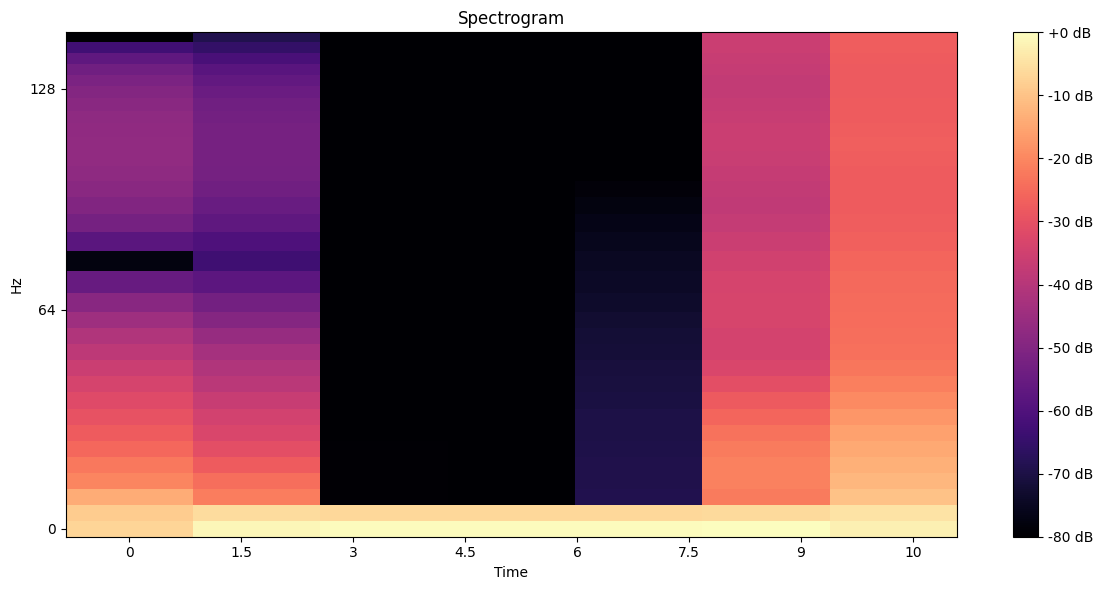

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Your time series data array
data = elastic_subset_energy
data = data.reshape(-1)  # Flatten the array to a 1D array
sampling_rate = 300  # The frequency of your data array (300 Hz)

# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(data, n_fft=64)

# Convert the STFT to a spectrogram (magnitude of STFT)
spectrogram = np.abs(stft)

# Display the spectrogram as an image
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

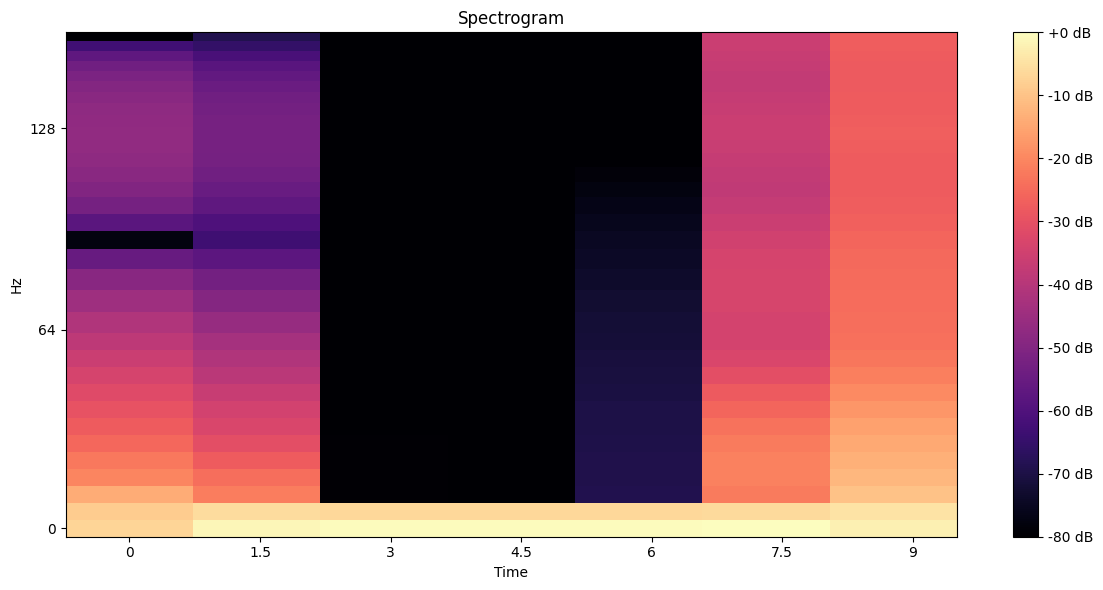

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Your time series data array
data = elastic_subset_energy
data = data.reshape(-1)  # Flatten the array to a 1D array
sampling_rate = 350  # The frequency of your data array (300 Hz)

# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(data, n_fft=64)

# Convert the STFT to a spectrogram (magnitude of STFT)
spectrogram = np.abs(stft)

# Display the spectrogram as an image
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

Preparing spectrogram of crosssection data obtained from above

In [ ]:
#A subset implementation of the energy data
elastic_subset_energy_spectogram = []
ionization_subset_energy_spectogram = []
excitation_subset_energy_spectogram = []

for i in range(subset_energy_data.shape[0]):

    nfft = 100
    noverlap = 50
    nperseg = nfft

    specgram = signal.spectrogram( subset_energy_data[i,0,:],fs=1,nfft=100,noverlap=50,nperseg=100,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    elastic_subset_energy_spectogram.append(specgram)

    """
    specgram = signal.spectrogram( subset_energy_data[i,1,:],fs=1,nfft=nfft,noverlap=noverlap,nperseg=nperseg,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    ionization_subset_energy_spectogram.append(specgram)

    specgram = signal.spectrogram( subset_energy_data[i,2,:],fs=1,nfft=nfft,noverlap=noverlap,nperseg=nperseg,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    excitation_subset_energy_spectogram.append(specgram)
    """


elastic_subset_energy_spectogram = np.array(elastic_subset_energy_spectogram)[:,:-1,:] # [:,:-1,:] is done for changing the shape from 5001 to 5000
#ionization_subset_energy_spectogram = np.array(ionization_subset_energy_spectogram)[:,:-1,:]
#excitation_subset_energy_spectogram = np.array(excitation_subset_energy_spectogram)[:,:-1,:]

In [ ]:
#A subset implementation of the energy data
elastic_subset_energy_spectogram = []
ionization_subset_energy_spectogram = []
excitation_subset_energy_spectogram = []

for i in range(subset_energy_data.shape[0]):

    nfft = 100
    noverlap = 50
    nperseg = 100

    specgram = signal.spectrogram( subset_energy_data[i,0,:],fs=1,nfft=nfft,noverlap=noverlap,nperseg=nperseg,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    elastic_subset_energy_spectogram.append(specgram)

    """
    specgram = signal.spectrogram( subset_energy_data[i,1,:],fs=1,nfft=nfft,noverlap=noverlap,nperseg=nperseg,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    ionization_subset_energy_spectogram.append(specgram)

    specgram = signal.spectrogram( subset_energy_data[i,2,:],fs=1,nfft=nfft,noverlap=noverlap,nperseg=nperseg,mode="psd")
    specgram = specgram[2]
    specgram = np.log(specgram)
    specgram = (specgram - np.min(specgram))/(np.max(specgram)-np.min(specgram))
    specgram = np.flip(specgram)
    excitation_subset_energy_spectogram.append(specgram)
    """


elastic_subset_energy_spectogram = np.array(elastic_subset_energy_spectogram)[:,:-1,:] # [:,:-1,:] is done for changing the shape from 5001 to 5000
#ionization_subset_energy_spectogram = np.array(ionization_subset_energy_spectogram)[:,:-1,:]
#excitation_subset_energy_spectogram = np.array(excitation_subset_energy_spectogram)[:,:-1,:]

In [ ]:
#A subset implementation of the energy data
elastic_subset_energy_spectogram[0].shape

(50, 1)

### **WGAN1 FOR GENERATING SPECTROGRAMS**

In [ ]:
#A subset implementation of the energy data
noise_dim = 10
BATCH_SIZE = 10
subset_energy_train_images = elastic_subset_energy_spectogram
subset_energy_train_images = subset_energy_train_images.reshape(subset_energy_train_images.shape[0], *(50,1,1)).astype("float32")
np.random.shuffle(subset_energy_train_images)
D = 64

In [ ]:
subset_energy_train_images.shape

(1, 50, 1, 1)

In [ ]:
subset_energy_train_images.shape[0]

1

In [ ]:
subset_energy_train_images.shape

(1, 50, 1, 1)

In [ ]:
def make_discriminator1():
    input_img = layers.Input(shape=(50,1,1))

    x = layers.Reshape((1,50))(input_img)

    x = layers.Conv1D(D, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*2, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*4, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*8, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    #x = layers.Conv1D(D*16, 5, strides=2, padding='same')(x)
    #x = layers.LeakyReLU(0.2)(x)

    #x = layers.Conv1D(D*32, 5, strides=2, padding='same')(x)
    #x = layers.LeakyReLU(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Dense(1)(x)

    discriminator1 = keras.models.Model(input_img, x, name="discriminator1")
    return discriminator1

discriminator1 = make_discriminator1()
discriminator1.summary()

Model: "discriminator1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50, 1, 1)]        0         
                                                                 
 reshape_12 (Reshape)        (None, 1, 50)             0         
                                                                 
 conv1d_52 (Conv1D)          (None, 1, 64)             16064     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 1, 64)             0         
                                                                 
 conv1d_53 (Conv1D)          (None, 1, 128)            41088     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 1, 128)            0         
                                                                 
 conv1d_54 (Conv1D)          (None, 1, 256)         

In [ ]:
D = 32

def make_generator1(noise_dim):
    noise = layers.Input(shape=(noise_dim))

    #x = layers.Dense(10,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)

    #x = layers.Dense(20,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)

    #x = layers.Dense(40,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)

    #x = layers.Dense(50,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)

    #x = layers.Dense(50,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("relu")(x)

    #x = layers.Dense(50,use_bias=False)(noise)
    #x = layers.BatchNormalization()(x)
    #x = layers.Activation("tanh")(x)

    x = layers.Dense(1*32*D, use_bias=False)(noise)
    x = layers.Reshape((1,32*D))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(16 * D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(8 * D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)
#     x = layers.Cropping1D(cropping=1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(4 * D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)
#     x = layers.Cropping1D(cropping=1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(2 * D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)
    x = layers.Cropping1D(cropping=1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(1 * D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(D, 5, padding='same')(x)
    x = layers.Activation("relu")(x)
    x = layers.Cropping1D(cropping=3)(x)

    x = layers.Conv1D(1, 5, padding='same')(x)
    x = layers.Activation("tanh")(x)

    x = layers.Reshape((50,1,1))(x)

    generator1 = keras.models.Model(noise, x, name="generator1")
    return generator1

generator1 = make_generator1(noise_dim)
generator1.summary()

Model: "generator1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_17 (Dense)            (None, 1024)              10240     
                                                                 
 reshape_13 (Reshape)        (None, 1, 1024)           0         
                                                                 
 batch_normalization_22 (Bat  (None, 1, 1024)          4096      
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 1, 1024)           0         
                                                                 
 up_sampling1d_22 (UpSamplin  (None, 2, 1024)          0         
 g1D)                                                   

WGAN-GP model - copied from https://keras.io/examples/generative/wgan_gp/


In [ ]:
class WGAN(keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=5,
        gp_weight=10.0,
    ):
        super(WGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]

        # Get the batch size
        batch_size = tf.shape(real_images)[0]

        # For each batch, we are going to perform the
        # following steps as laid out in the original paper:
        # 1. Train the generator and get the generator loss
        # 2. Train the discriminator and get the discriminator loss
        # 3. Calculate the gradient penalty
        # 4. Multiply this gradient penalty with a constant weight factor
        # 5. Add the gradient penalty to the discriminator loss
        # 6. Return the generator and discriminator losses as a loss dictionary

        # Train the discriminator first. The original paper recommends training
        # the discriminator for `x` more steps (typically 5) as compared to
        # one step of the generator. Here we will train it for 3 extra steps
        # as compared to 5 to reduce the training time.
        for i in range(self.d_steps):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images = self.generator(random_latent_vectors, training=True)
                # Get the logits for the fake images
                fake_logits = self.discriminator(fake_images, training=True)
                # Get the logits for the real images
                real_logits = self.discriminator(real_images, training=True)

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        # Train the generator
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_images = self.generator(random_latent_vectors, training=True)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator(generated_images, training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=6, latent_dim=noise_dim):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)

        for i in range(self.num_img):
            img = generated_images[i].numpy()
            plt.imshow(img[:,:,0],aspect="auto")
            #plt.savefig("D:\\BTP\\elastic_generated\\{idx}_{epoch}.jpg".format(idx=i,epoch=epoch))

Epoch 1/1000
1/1 [==============================] - 39s 39s/step - d_loss: 9.5402 - g_loss: 0.0018
Epoch 2/1000
1/1 [==============================] - 0s 173ms/step - d_loss: 8.6877 - g_loss: 0.0137
Epoch 3/1000
1/1 [==============================] - 0s 161ms/step - d_loss: 4.3671 - g_loss: 0.0312
Epoch 4/1000
1/1 [==============================] - 0s 158ms/step - d_loss: 1.6776 - g_loss: 0.0594
Epoch 5/1000
1/1 [==============================] - 0s 169ms/step - d_loss: -0.4592 - g_loss: 0.0885
Epoch 6/1000
1/1 [==============================] - 0s 151ms/step - d_loss: -1.7934 - g_loss: 0.1218
Epoch 7/1000
1/1 [==============================] - 0s 155ms/step - d_loss: -2.0747 - g_loss: 0.1727
Epoch 8/1000
1/1 [==============================] - 0s 168ms/step - d_loss: 56.9816 - g_loss: 0.1966
Epoch 9/1000
1/1 [==============================] - 0s 162ms/step - d_loss: 4.5575 - g_loss: 0.2492
Epoch 10/1000
1/1 [==============================] - 0s 149ms/step - d_loss: -1.9468 - g_loss: 0.

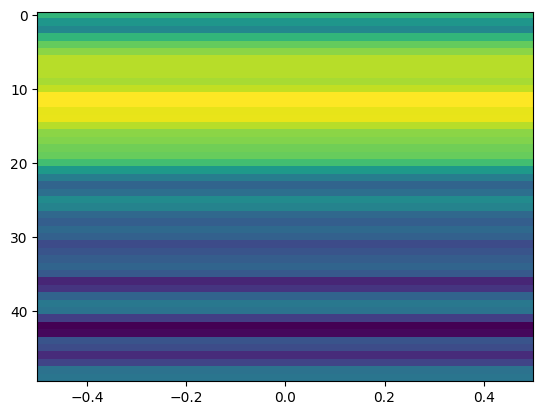

In [ ]:
# Instantiate the optimizer for both networks
# (learning_rate=0.0002, beta_1=0.5 are recommended)
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)

# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)


# Set the number of epochs for trainining.
epochs = 1000

# Instantiate the customer `GANMonitor` Keras callback.

## UNCOMMENT FOR COMPLETE CODE
cbk = GANMonitor(num_img=1, latent_dim=noise_dim)

# Instantiate the WGAN model.
wgan = WGAN(
    discriminator=discriminator1,
    generator=generator1,
    latent_dim=noise_dim,
    discriminator_extra_steps=5,
)

# Compile the WGAN model.
wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)

# Start training the model.
#wgan.fit(train_images, batch_size=BATCH_SIZE, epochs=epochs, callbacks=[cbk])
wgan.fit(subset_energy_train_images, batch_size=BATCH_SIZE, epochs=epochs, callbacks=[cbk])

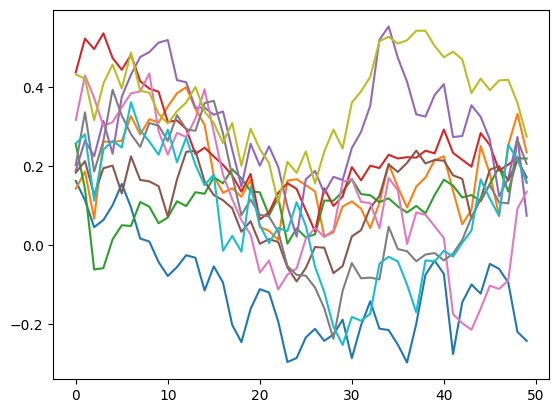

In [ ]:
synth_data = []
for i in range(10):
    x = generator1(tf.random.normal(shape=(1, noise_dim)), training=False)
    x = x.numpy()
    #x = (x+1)*(max_crosssection[0]-min_crosssection[0])/2 + min_crosssection[0]
    synth_data.append(x[0,:,0,0])
    plt.plot(x[0,:,0,0])

In [ ]:
generator1.save("generator_model1_1000epoch")

In [ ]:
generator1.save("generator_model1_susbset_energy_1000epoch")

WGAN2

In [ ]:
import math

elastic_crosssection = []
ionization_crosssection = []
excitation_crosssection = []
elastic_energy = []
ionization_energy = []
excitation_energy = []

for species in loaded_json_subset_energy:
    elastic_crosssection.append(species['elastic']['energy'])
    ionization_crosssection.append(species['ionization']['energy'])
    excitation_crosssection.append(species['excitation']['energy'])
    elastic_energy.append(species['elastic']['energy'])
    ionization_energy.append(species['ionization']['energy'])
    excitation_energy.append(species['excitation']['energy'])

elastic_crosssection = np.array(elastic_crosssection)
ionization_crosssection = np.array(ionization_crosssection)
excitation_crosssection = np.array(excitation_crosssection)
crosssection_data = np.stack([elastic_crosssection], axis=2)
crosssection_data = np.swapaxes(crosssection_data,1,2)

crosssection_data = crosssection_data + 10**-25
crosssection_data = np.log(crosssection_data)

# Normalizing between -1 and 1 by min max

min_crosssection = np.amin(crosssection_data,axis=(0,2),keepdims=True)

max_crosssection = np.amax(crosssection_data,axis=(0,2),keepdims=True)

crosssection_data = 2*(crosssection_data - min_crosssection)/(max_crosssection - min_crosssection) - 1

# y = 2*(x-min)/(max-min) - 1
# x = (y+1)*(max-min)/2 + min

print("Shape of min_crosssection :",min_crosssection.shape)
print("Shape of max_crosssection :",max_crosssection.shape)
print("Shape of crosssection_data :",crosssection_data.shape)

Shape of min_crosssection : (1, 1, 1)
Shape of max_crosssection : (1, 1, 1)
Shape of crosssection_data : (1, 1, 100)


In [ ]:
generator1 = keras.models.load_model('/content/generator_model1_1000epoch/')

In [ ]:
generator_subset_energy_1 = keras.models.load_model('/content/generator_model1_susbset_energy_1000epoch/')

In [ ]:
noise_dim = 10
BATCH_SIZE = 10
train_images = crosssection_data[:,0,:]
train_images = train_images.reshape(crosssection_data.shape[0],crosssection_data.shape[2],1)
train_images = train_images.reshape(train_images.shape[0], *(100,1,1)).astype("float32")
np.random.shuffle(train_images)
D = 32
train_images.shape

(1, 100, 1, 1)

In [ ]:
def make_discriminator2():
    input_img = layers.Input(shape=(100,1,1))

    x = layers.Reshape((100,1))(input_img)

    x = layers.Conv1D(D, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*2, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*4, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*8, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv1D(D*16, 5, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

#     x = layers.Conv1D(D*32, 5, strides=2, padding='same')(x)
#     x = layers.LeakyReLU(0.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dense(1)(x)

    discriminator2 = keras.models.Model(input_img, x, name="discriminator2")
    return discriminator2

discriminator2 = make_discriminator2()
discriminator2.summary()

Model: "discriminator2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 1, 1)]       0         
                                                                 
 reshape_15 (Reshape)        (None, 100, 1)            0         
                                                                 
 conv1d_63 (Conv1D)          (None, 50, 32)            192       
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 50, 32)            0         
                                                                 
 conv1d_64 (Conv1D)          (None, 25, 64)            10304     
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 25, 64)            0         
                                                                 
 conv1d_65 (Conv1D)          (None, 13, 128)        

In [ ]:
D = 16

def make_generator2():
    noise = layers.Input(shape=(50,1,1))

    x = layers.Reshape((50,1))(noise)

    x = layers.Conv1D(16 * D, 10, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv1D(8 * D, 10, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv1D(4 * D, 10, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv1D(2 * D, 10, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv1D(1 , 10, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(2 * D, 10, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(4 * D, 10, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Cropping1D(1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(4 * D, 10, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Cropping1D(1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(8 * D, 10, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Cropping1D(1)(x)

    x = layers.UpSampling1D(size=2)(x)
    x = layers.Conv1D(1, 10, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("tanh")(x)

    x = layers.Reshape((100,1,1))(x)

    generator2 = keras.models.Model(noise, x, name="generator2")
    return generator2

generator2 = make_generator2()
generator2.summary()

Model: "generator2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 50, 1, 1)]        0         
                                                                 
 reshape_16 (Reshape)        (None, 50, 1)             0         
                                                                 
 conv1d_68 (Conv1D)          (None, 25, 256)           2816      
                                                                 
 batch_normalization_23 (Bat  (None, 25, 256)          1024      
 chNormalization)                                                
                                                                 
 activation_44 (Activation)  (None, 25, 256)           0         
                                                                 
 conv1d_69 (Conv1D)          (None, 13, 128)           327808    
                                                        

In [ ]:
class WGAN(keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=5,
        gp_weight=10.0,
    ):
        super(WGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image

        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]

        # Get the batch size
        batch_size = tf.shape(real_images)[0]

        # For each batch, we are going to perform the
        # following steps as laid out in the original paper:
        # 1. Train the generator and get the generator loss
        # 2. Train the discriminator and get the discriminator loss
        # 3. Calculate the gradient penalty
        # 4. Multiply this gradient penalty with a constant weight factor
        # 5. Add the gradient penalty to the discriminator loss
        # 6. Return the generator and discriminator losses as a loss dictionary

        # Train the discriminator first. The original paper recommends training
        # the discriminator for `x` more steps (typically 5) as compared to
        # one step of the generator. Here we will train it for 3 extra steps
        # as compared to 5 to reduce the training time.
        for i in range(self.d_steps):
            # Get the latent vector
            random_latent_vectors = generator_subset_energy_1(tf.random.normal(
                shape=(batch_size, self.latent_dim)), training=False)
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images = self.generator(random_latent_vectors, training=True)
                # Get the logits for the fake images
                fake_logits = self.discriminator(fake_images, training=True)
                # Get the logits for the real images
                real_logits = self.discriminator(real_images, training=True)

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        # Train the generator
        # Get the latent vector
        random_latent_vectors = generator_subset_energy_1(tf.random.normal(
                shape=(batch_size, self.latent_dim)), training=False)
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_images = self.generator(random_latent_vectors, training=True)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator(generated_images, training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=6, latent_dim=noise_dim):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = generator_subset_energy_1(tf.random.normal(
                shape=(BATCH_SIZE, self.latent_dim)), training=False)
        generated_images = self.model.generator(random_latent_vectors)

        plt.figure()
        for i in range(self.num_img):
            img = generated_images[i].numpy()
            plt.plot(img[:,:,0])
        #plt.savefig("D:\\BTP\\elastic_generated_series\\{epoch}.jpg".format(epoch=epoch))
        plt.close()

In [ ]:
# Instantiate the optimizer for both networks
# (learning_rate=0.0002, beta_1=0.5 are recommended)
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)

# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)


# Set the number of epochs for trainining.
epochs = 1000

# Instantiate the customer `GANMonitor` Keras callback.

## UNCOMMENT FOR COMPLETE CODE
cbk = GANMonitor(num_img=3, latent_dim=noise_dim)

# Instantiate the WGAN model.
wgan2 = WGAN(
    discriminator=discriminator2,
    generator=generator2,
    latent_dim=noise_dim,
    discriminator_extra_steps=5,
)

# Compile the WGAN model.
wgan2.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)

# Start training the model.
wgan2.fit(train_images, batch_size=BATCH_SIZE, epochs=epochs, callbacks=[cbk])

Epoch 1/1000
1/1 [==============================] - 38s 38s/step - d_loss: 8.7690 - g_loss: 0.1299
Epoch 2/1000
1/1 [==============================] - 0s 326ms/step - d_loss: 4.4571 - g_loss: 0.6058
Epoch 3/1000
1/1 [==============================] - 0s 360ms/step - d_loss: -0.7814 - g_loss: 1.7061
Epoch 4/1000
1/1 [==============================] - 0s 336ms/step - d_loss: -4.3333 - g_loss: 3.9032
Epoch 5/1000
1/1 [==============================] - 0s 339ms/step - d_loss: -4.7501 - g_loss: 4.4149
Epoch 6/1000
1/1 [==============================] - 0s 349ms/step - d_loss: -4.7205 - g_loss: 4.6331
Epoch 7/1000
1/1 [==============================] - 0s 341ms/step - d_loss: -5.4152 - g_loss: 5.1185
Epoch 8/1000
1/1 [==============================] - 0s 354ms/step - d_loss: -4.2420 - g_loss: 3.9132
Epoch 9/1000
1/1 [==============================] - 0s 341ms/step - d_loss: -4.8692 - g_loss: 4.5690
Epoch 10/1000
1/1 [==============================] - 0s 339ms/step - d_loss: -5.3960 - g_loss:

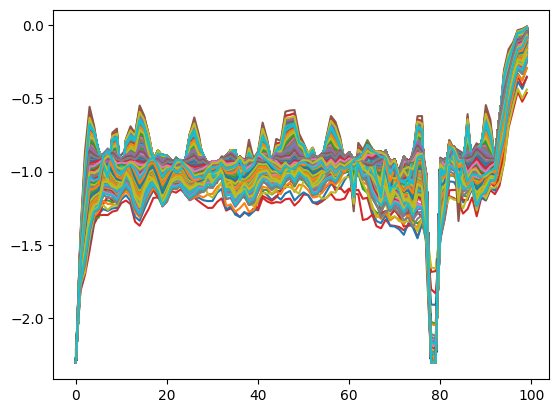

In [ ]:
synth_data = []
for i in range(1000):
    x = generator2(generator_subset_energy_1(tf.random.normal(shape=(1, noise_dim)), training=False),training=False)
    x = x.numpy()
    x = (x+1)*(max_crosssection[0]-min_crosssection[0])/2 + min_crosssection[0]
    synth_data.append(x[0,:,0,0])
    plt.plot(x[0,:,0,0])

In [ ]:
from sklearn.decomposition import PCA

synth_data = np.array(synth_data)
synth_data.shape

elastic_data = (crosssection_data[:,0,:]+1)*(max_crosssection[0][0]-min_crosssection[0][0])/2 + min_crosssection[0][0]
elastic_crosssection = np.log(elastic_crosssection + 10**-25)
elastic_data.shape


(1, 100)

In [ ]:
pca = PCA(n_components=1)
pca_results = pca.fit_transform(elastic_data)
pca_hat_results = pca.fit_transform(synth_data[:1000])
f, ax = plt.subplots(1)
plt.scatter(pca_results[:,0], pca_results[:,0], alpha = 0.2, label = "Original")
plt.scatter(pca_hat_results[:,0], pca_hat_results[:,0], alpha = 0.2, label = "Synthetic")
ax.legend()
plt.title('PCA plot')
plt.xlabel('x-pca')
plt.ylabel('y_pca')
plt.show()